## Description
***

This code is to produce plots of differences in the bias between the following model runs, as suggested by Francois by email:

1. `OSTIA - CCI`
2. `CCI - TSSTL3`
3. `CCI - TSSTL2`
4. `TSSTL3 - TSSTL2`

The bias is defined as:
$$ \text{bias} = \overline{\text{Model}} - \overline{\text{Obs}} $$

And to compare two biases the absolute values are used:
$$ \text{Diff}_{\text{bias}} = | \text{Bias}_{\text{Assim1}} | - | \text{Bias}_{\text{Assim2}} | $$

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
from scipy import stats

In [5]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [11]:
# loading EN4 analysis data
ds_EN4 = xr.open_dataset('../Data/EN4_regional.nc')
ds_EN4 = ds_EN4.sel(time=slice('2009-01','2009-09'))
ds_EN4['temperature'] = ds_EN4['temperature'] - 273.15
ds_EN4 = ds_EN4.rename({'lat': 'latitude', 'lon': 'longitude'})


# loading HYCOMcci data
ds_hycomcci = xr.open_dataset('../Data/HYCOM_EN4_horizontal/CCI_SEN25_EN4H.nc')
ds_hycomcci['time'].values = ds_EN4['time'].values
ds_hycomcci['latitude'].values = ds_EN4['latitude'].values
ds_hycomcci['longitude'].values = ds_EN4['longitude'].values
ds_hycomcci['depth'].values = ds_EN4['depth'].values


# loading OSTIA data
ds_hycomostia = xr.open_dataset('../Data/HYCOM_EN4_horizontal/OSTIA_SEN30_EN4H.nc')
ds_hycomostia['time'].values = ds_EN4['time'].values
ds_hycomostia['latitude'].values = ds_EN4['latitude'].values
ds_hycomostia['longitude'].values = ds_EN4['longitude'].values
ds_hycomostia['depth'].values = ds_EN4['depth'].values


# loading AVHRR data
ds_hycomTSSTL2 = xr.open_dataset('../Data/HYCOM_EN4_horizontal/TSSTL2_SEN50_EN4H.nc')
ds_hycomTSSTL2['time'].values = ds_EN4['time'].values
ds_hycomTSSTL2['latitude'].values = ds_EN4['latitude'].values
ds_hycomTSSTL2['longitude'].values = ds_EN4['longitude'].values
ds_hycomTSSTL2['depth'].values = ds_EN4['depth'].values


# loading ATSR data
ds_hycomTSSTL3 = xr.open_dataset('../Data/HYCOM_EN4_horizontal/TSSTL3_SEN40_EN4H.nc')
ds_hycomTSSTL3['time'].values = ds_EN4['time'].values
ds_hycomTSSTL3['latitude'].values = ds_EN4['latitude'].values
ds_hycomTSSTL3['longitude'].values = ds_EN4['longitude'].values
ds_hycomTSSTL3['depth'].values = ds_EN4['depth'].values


# loading HYCOMFree data
ds_hycomfree = xr.open_dataset('../Data/HYCOM_EN4_horizontal/FREE_EN4H.nc')
ds_hycomfree['time'].values = ds_EN4['time'].values
ds_hycomfree['latitude'].values = ds_EN4['latitude'].values
ds_hycomfree['longitude'].values = ds_EN4['longitude'].values
ds_hycomfree['depth'].values = ds_EN4['depth'].values

# 1. HYCOM<sub>OSTIA</sub> - HYCOM<sub>CCI</sub>

## 1.1 Temperature

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


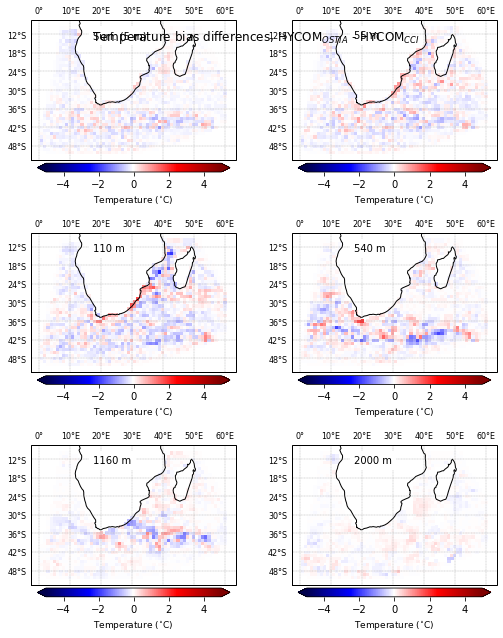

In [21]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature bias differences, HYCOM$_{OSTIA}$ - HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = np.absolute(ds_hycomostia['temperature'].mean(dim='time')[depths[s]] - ds_EN4['temperature'].mean(dim='time')[depths[s]].values) - np.absolute(ds_hycomcci['temperature'].mean(dim='time')[depths[s]] - ds_EN4['temperature'].mean(dim='time')[depths[s]].values)
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-5, vmax=5)
#     plt.get_cmap('seismic').set_bad(color='whitesmoke')
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_Bias_HYCOMostiaHYCOMcci.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.1 Salinity

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


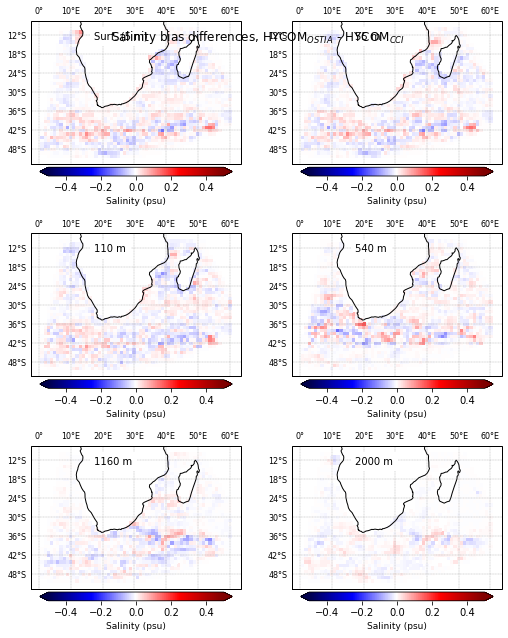

In [22]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity bias differences, HYCOM$_{OSTIA}$ - HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = np.absolute(ds_hycomostia['salinity'].mean(dim='time')[depths[s]] - ds_EN4['salinity'].mean(dim='time')[depths[s]].values) - np.absolute(ds_hycomcci['salinity'].mean(dim='time')[depths[s]] - ds_EN4['salinity'].mean(dim='time')[depths[s]].values)
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-0.5, vmax=0.5)
#     plt.get_cmap('seismic').set_bad(color='whitesmoke')
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Salinity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_Bias_HYCOMostiaHYCOMcci.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

# 2. HYCOM<sub>CCI</sub> - HYCOM<sub>TSSTL3</sub>

## 2.1 Temperature

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


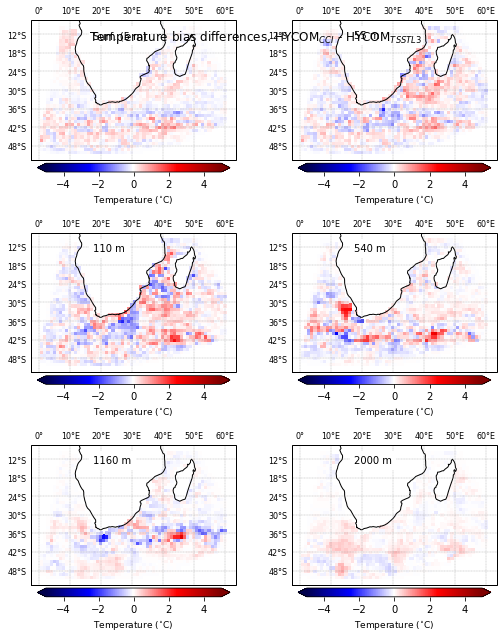

In [23]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature bias differences, HYCOM$_{CCI}$ - HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = np.absolute(ds_hycomcci['temperature'].mean(dim='time')[depths[s]] - ds_EN4['temperature'].mean(dim='time')[depths[s]].values) - np.absolute(ds_hycomTSSTL3['temperature'].mean(dim='time')[depths[s]] - ds_EN4['temperature'].mean(dim='time')[depths[s]].values)
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-5, vmax=5)
#     plt.get_cmap('seismic').set_bad(color='whitesmoke')
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_Bias_HYCOMcciHYCOMTSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.1 Salinity

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


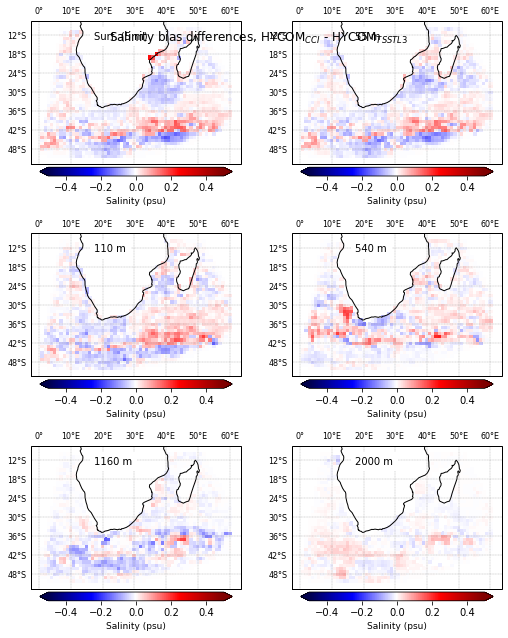

In [24]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity bias differences, HYCOM$_{CCI}$ - HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = np.absolute(ds_hycomcci['salinity'].mean(dim='time')[depths[s]] - ds_EN4['salinity'].mean(dim='time')[depths[s]].values) - np.absolute(ds_hycomTSSTL3['salinity'].mean(dim='time')[depths[s]] - ds_EN4['salinity'].mean(dim='time')[depths[s]].values)
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-0.5, vmax=0.5)
#     plt.get_cmap('seismic').set_bad(color='whitesmoke')
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Salinity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_Bias_HYCOMcciHYCOMTSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

# 3. HYCOM<sub>CCI</sub> - HYCOM<sub>TSSTL2</sub>

## 3.1 Temperature

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


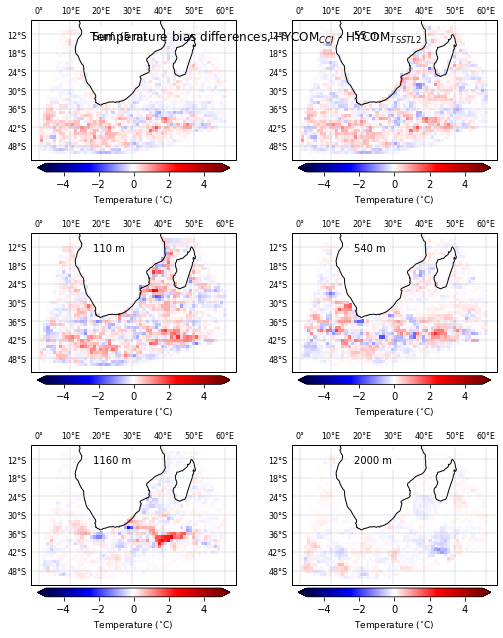

In [25]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature bias differences, HYCOM$_{CCI}$ - HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = np.absolute(ds_hycomcci['temperature'].mean(dim='time')[depths[s]] - ds_EN4['temperature'].mean(dim='time')[depths[s]].values) - np.absolute(ds_hycomTSSTL2['temperature'].mean(dim='time')[depths[s]] - ds_EN4['temperature'].mean(dim='time')[depths[s]].values)
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-5, vmax=5)
#     plt.get_cmap('seismic').set_bad(color='whitesmoke')
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_Bias_HYCOMcciHYCOMTSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.1 Salinity

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


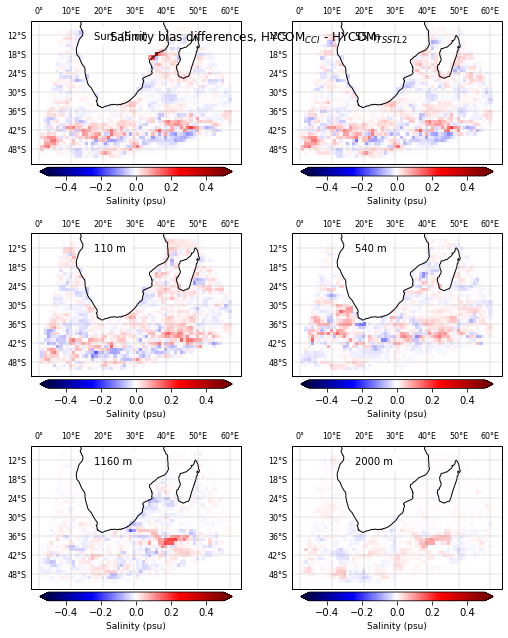

In [26]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity bias differences, HYCOM$_{CCI}$ - HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = np.absolute(ds_hycomcci['salinity'].mean(dim='time')[depths[s]] - ds_EN4['salinity'].mean(dim='time')[depths[s]].values) - np.absolute(ds_hycomTSSTL2['salinity'].mean(dim='time')[depths[s]] - ds_EN4['salinity'].mean(dim='time')[depths[s]].values)
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-0.5, vmax=0.5)
#     plt.get_cmap('seismic').set_bad(color='whitesmoke')
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Salinity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_Bias_HYCOMcciHYCOMTSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

# 4. HYCOM<sub>TSSTL3</sub> - HYCOM<sub>TSSTL2</sub>

## 4.1 Temperature

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


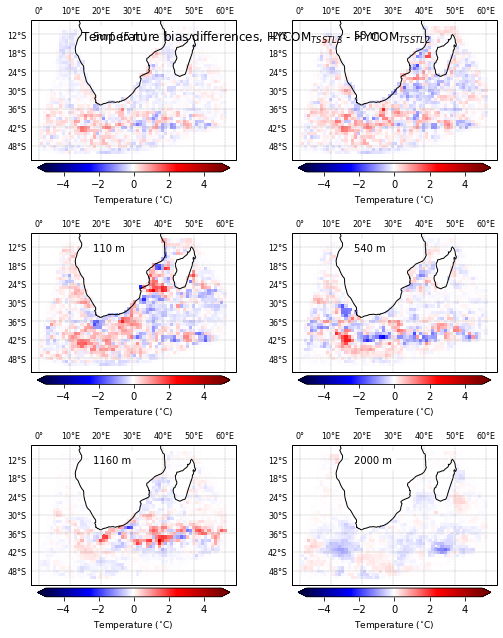

In [27]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature bias differences, HYCOM$_{TSSTL3}$ - HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = np.absolute(ds_hycomTSSTL3['temperature'].mean(dim='time')[depths[s]] - ds_EN4['temperature'].mean(dim='time')[depths[s]].values) - np.absolute(ds_hycomTSSTL2['temperature'].mean(dim='time')[depths[s]] - ds_EN4['temperature'].mean(dim='time')[depths[s]].values)
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-5, vmax=5)
#     plt.get_cmap('seismic').set_bad(color='whitesmoke')
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_Bias_HYCOMTSSTL3HYCOMTSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.1 Salinity

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


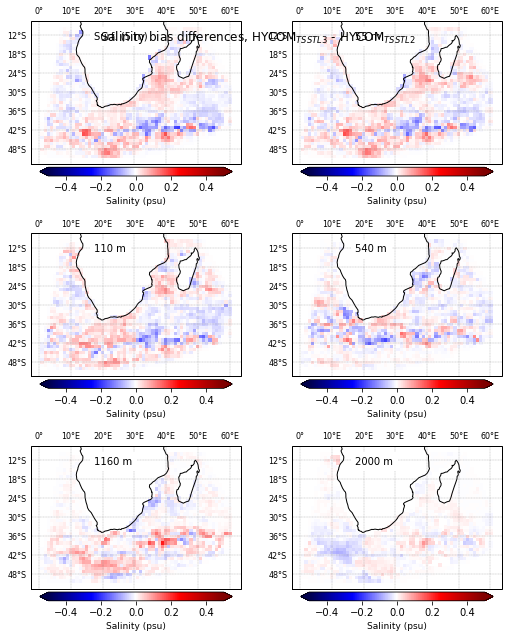

In [28]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity bias differences, HYCOM$_{TSSTL3}$ - HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = np.absolute(ds_hycomTSSTL3['salinity'].mean(dim='time')[depths[s]] - ds_EN4['salinity'].mean(dim='time')[depths[s]].values) - np.absolute(ds_hycomTSSTL2['salinity'].mean(dim='time')[depths[s]] - ds_EN4['salinity'].mean(dim='time')[depths[s]].values)
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-0.5, vmax=0.5)
#     plt.get_cmap('seismic').set_bad(color='whitesmoke')
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Salinity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_Bias_HYCOMTSSTL3HYCOMTSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()